## Ventilation Coefficients in Mexico City

A ventilation coefficient (VC) is a number that is computed by doing:

$$ VC = <\vec{u}_H> \ h_{pbl} \quad [m^2/s],$$

where $<\vec{u}_H>$ is the mean horizontal velocity inside the planetary boundary layer (PBL) and  $h_{pbl}$ is the planetary boundary layer height. In theory, if the VC is low, it indicates that there are bad conditions for the dispersal of pollutants, therefore there is going to be bad pollution. If the VC is, it means that there are good conditions for the dispersion of contaminants therefore, there is going to be no pollution.

The thing is that a low VC and a high VC is very ambiguous, you need to define a threshold for VC to define a potentially bad episode of pollution or a no pollution episode. So, in the sixties, an American Scientist defined these criteria (for the East coast of USA), in which he established that under a value of $6000 \ m^2/s$ for VC and a mean horizontal wind under $4 \ m/s$, there is going to be bad air quality. We wanted to test this criterium for Mexico City and, if necessary, redefine it. 

A good way of visualizing this is by doing a scatter plot for all the measurements of <U> and PBLH. In other words we plot <U> vs. PBLH, in wich each plot is a measurement at a precise time (which is not indicated). Example:


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.gridspec import GridSpec

#### Quick word about the data

There are several stations in Mexico City measuring the pollution. I only picked the stations that measure ozone, PM10 and PM2.5. you will see in the data folder that there are six stations: MER (Merced), PED (Pedregal), SFE (Santa Fe), SAG, UIZ, and TLA, which I don't remember their complete name. The VC, pblh and u_mean come from the point in the model that contains that station. The model had a resolution of 5km but I did an interpolation over a 2.5km grid in order to have a better estimation.

In [2]:
vc = pd.read_csv('../datos/dataframes_VC/MER/vc_MER.csv', index_col=0)

In [3]:
vc.head()

,VC,pblh,u_mean,O3,PM2.5,PM10
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,NaN,NaN,NaN,3.0,84.0,123.0
2015-01-01 02:00:00,NaN,NaN,NaN,2.0,79.0,113.0
2015-01-01 03:00:00,NaN,NaN,NaN,2.0,87.0,118.0
2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN


You can see that the data is cleaned and compiled in data frames.


In [4]:
def vc_criterium(x):
    return 6000/x

x_range = np.linspace(100, 4000)

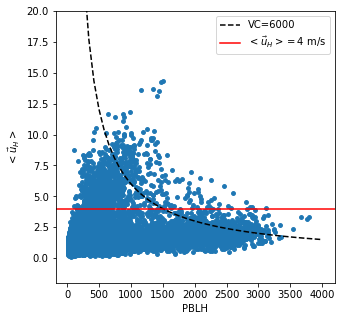

In [34]:
plt.figure(figsize=(5,5))
plt.scatter(vc.pblh, vc.u_mean, s=15)
plt.plot(x_range, vc_criterium(x_range), '--k', label='VC=6000')
plt.axhline(4, color='red', label=r'$<\vec{u}_H>=4$ m/s')
plt.ylim(-2, 20)
plt.xlabel('PBLH')
plt.ylabel(r'$<\vec{u}_H>$')
plt.legend()

So each point represents the meteorological state for one location for all year. 

To this plot we can add the pollutants to see, more or less in which "regions" the worst pollution events are located.

### Ozone

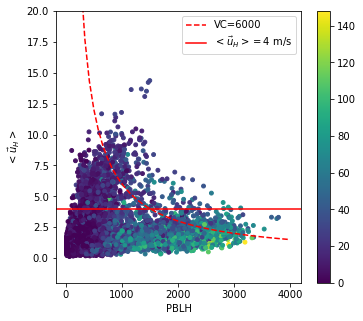

In [35]:
plt.figure(figsize=(5.5,5))
im = plt.scatter(vc.pblh, vc.u_mean, c=vc.O3, s=15)
plt.plot(x_range, vc_criterium(x_range), '--r', label='VC=6000')
plt.axhline(4, color='red', label=r'$<\vec{u}_H>=4$ m/s')
plt.ylim(-2, 20)
plt.xlabel('PBLH')
plt.ylabel(r'$<\vec{u}_H>$')
plt.legend()
plt.colorbar(im)

### PM2.5

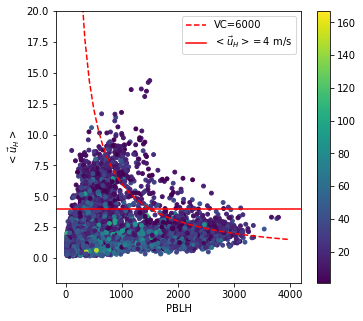

In [36]:
plt.figure(figsize=(5.5,5))
im = plt.scatter(vc.pblh, vc.u_mean, c=vc['PM2.5'], s=15)
plt.plot(x_range, vc_criterium(x_range), '--r', label='VC=6000')
plt.axhline(4, color='red', label=r'$<\vec{u}_H>=4$ m/s')
plt.ylim(-2, 20)
plt.xlabel('PBLH')
plt.ylabel(r'$<\vec{u}_H>$')
plt.legend()
plt.colorbar(im)

### PM10

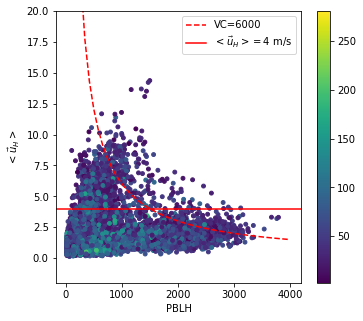

In [37]:
plt.figure(figsize=(5.5,5))
im = plt.scatter(vc.pblh, vc.u_mean, c=vc['PM10'], s=15)
plt.plot(x_range, vc_criterium(x_range), '--r', label='VC=6000')
plt.axhline(4, color='red', label=r'$<\vec{u}_H>=4$ m/s')
plt.ylim(-2, 20)
plt.xlabel('PBLH')
plt.ylabel(r'$<\vec{u}_H>$')
plt.legend()
plt.colorbar(im)

The meteorological variables come from a model, the WRF, and from a previous work that I did, we know that the PBLH is poorly represented during the night with respect to observations. This causes that the VC during the is close to zero. So a thing that we can do is only use the data during the day let's say 8:00 to 19:00.

In [15]:
vc.index = pd.to_datetime(vc.index)

In [17]:
vc_day = vc.between_time('8:00', '19:00')

In [19]:
vc.shape

(8760, 6)

Text(0.5, 1.0, 'Ozone')

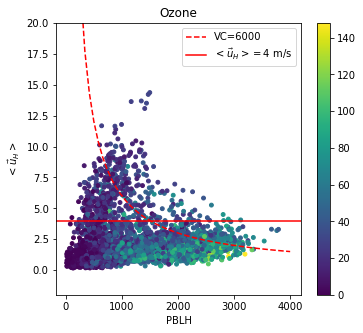

In [38]:
plt.figure(figsize=(5.5,5))
im = plt.scatter(vc_day.pblh, vc_day.u_mean, c=vc_day.O3, s=15)
plt.plot(x_range, vc_criterium(x_range), '--r', label='VC=6000')
plt.axhline(4, color='red', label=r'$<\vec{u}_H>=4$ m/s')
plt.ylim(-2, 20)
plt.xlabel('PBLH')
plt.ylabel(r'$<\vec{u}_H>$')
plt.legend()
plt.colorbar(im)
plt.title('Ozone')

## Other ideas that I explored

I also did 'surface' interpolation of the pollutants over this coordinates to see if there where islands or regions where the high pollution gathered around.

![interpolation.png](interpolation.png)

The only interpolation that is possible to do is a linear one which leaves a lot of holes in the surface plot, it is not ideal. These were the plots that I presented in my bachelor's thesis, not very proud.

### Classification

For the classification, I did this kind of stuff:

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


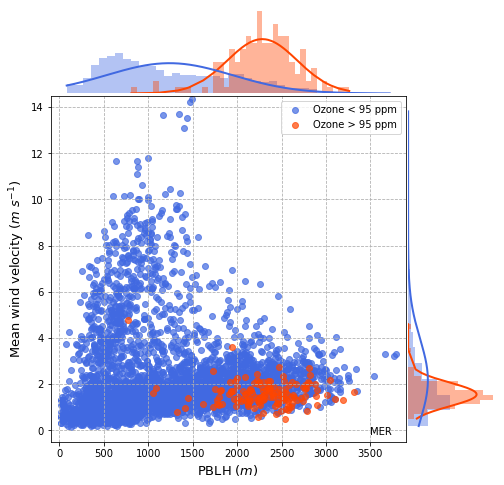

In [29]:
color_1 = 'orangered'
color_2 = 'royalblue'
nom_o3 = 95
bins = 128

h = np.sort(vc_day.loc[vc_day.O3 > 95]['pblh'].dropna())
j = np.sort(vc_day.loc[vc_day.O3 < 95]['pblh'].dropna())

fit_h = stats.norm.pdf(h, np.mean(h), np.std(h))
# kde_h = stats.gaussian_kde(h)
# x_h = np.linspace(h.min(), h.max(), bins)
# fit_h = kde_h(x_h)

fit_j = stats.norm.pdf(j, np.mean(j), np.std(j))
kernel_h = stats.gaussian_kde(j)

k = sorted(vc_day.loc[vc_day.O3 > 95]['u_mean'].dropna())
l = sorted(vc_day.loc[vc_day.O3 < 95]['u_mean'].dropna())

fit_k = stats.norm.pdf(k, np.mean(k), np.std(k))
kernel_k = stats.gaussian_kde(k)
fit_l = stats.norm.pdf(l, np.mean(l), np.std(l))
kernel_l = stats.gaussian_kde(l)

fig = plt.figure(figsize=(8,8))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.01, hspace=0.01)

ax1 = fig.add_subplot(gs[0])
ax1.hist(vc_day.loc[vc_day.O3 < 95]['pblh'],density = True, alpha = 0.4, color = color_2, bins = 40)
ax1.hist(vc_day.loc[vc_day.O3 > 95]['pblh'],density = True, alpha = 0.4, color = color_1, bins = 40)
ax1.plot(h,fit_h, c = color_1, linewidth=2)
#ax1.plot(x_h, fit_h, c = color_1, linewidth=2)
ax1.plot(j,fit_j, c = color_2, linewidth=2)
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1])
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[2])
#CS = ax3.contour(xi,yi,VC_grid, colors='k', levels=[3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000],alpha = 0.7)
#ax3.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
ax3.scatter(vc_day.loc[vc_day.O3 < nom_o3]['pblh'], vc_day.loc[vc_day.O3 < nom_o3]['u_mean'], 
            c = color_2, alpha = 0.7, label = "Ozone < 95 ppm")
ax3.scatter(vc_day.loc[vc_day.O3 > nom_o3]['pblh'], vc_day.loc[vc_day.O3 > nom_o3]['u_mean'], 
            c = color_1, alpha = 0.7, label = "Ozone > 95 ppm")
ax3.set_xlabel(r'PBLH ($m$)', fontsize = 13)
ax3.set_ylabel(r'Mean wind velocity ($m \ s^{-1}$)', fontsize = 13)
ax3.set_xlim(-100,3900)
ax3.set_ylim(-0.5,14.5)
ax3.legend()
ax3.text(0.9, 0.02, 'MER', transform=ax3.transAxes)
ax3.grid(linestyle='--')


ax4 = fig.add_subplot(gs[3])
ax4.hist(vc_day.loc[vc_day.O3 < 95]['u_mean'],density = True, alpha = 0.4, color = color_2, bins = 20, 
         orientation = "horizontal")
ax4.hist(vc_day.loc[vc_day.O3 > 95]['u_mean'],density = True, alpha = 0.4, color = color_1, bins = 20,
        orientation = "horizontal")
ax4.plot(fit_k, k, c = color_1, linewidth=2)
ax4.plot(fit_l, l, c = color_2, linewidth=2)
ax4.set_axis_off()

ax4.set_axis_off()

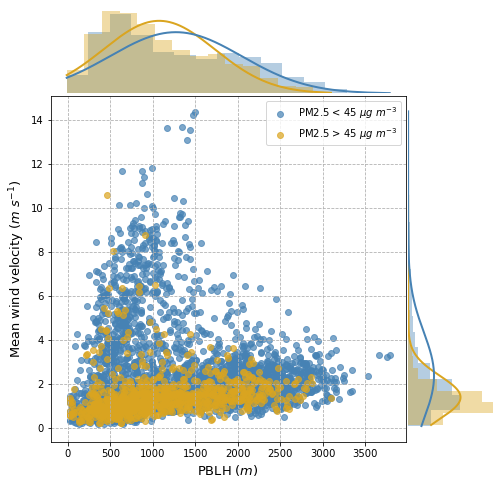

In [30]:
color_1 = 'goldenrod'
color_2 = 'steelblue'
nom_pm25 = 45

h = sorted(vc_day.loc[vc_day['PM2.5'] > nom_pm25]['pblh'].dropna())
j = sorted(vc_day.loc[vc_day['PM2.5'] < nom_pm25]['pblh'].dropna())

fit_h = stats.norm.pdf(h, np.mean(h), np.std(h))
fit_j = stats.norm.pdf(j, np.mean(j), np.std(j))

k = sorted(vc_day.loc[vc_day['PM2.5'] > nom_pm25]['u_mean'].dropna())
l = sorted(vc_day.loc[vc_day['PM2.5'] < nom_pm25]['u_mean'].dropna())

fit_k = stats.norm.pdf(k, np.mean(k), np.std(k))
fit_l = stats.norm.pdf(l, np.mean(l), np.std(l))

fig = plt.figure(figsize=(8,8))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.01, hspace=0.01)

ax1 = fig.add_subplot(gs[0])
ax1.hist(vc_day.loc[vc_day['PM2.5'] < nom_pm25]['pblh'],density = True, alpha = 0.4, color = color_2, bins = 15)
ax1.hist(vc_day.loc[vc_day['PM2.5'] > nom_pm25]['pblh'],density = True, alpha = 0.4, color = color_1, bins = 15)
ax1.plot(h,fit_h, c = color_1, linewidth=2)
ax1.plot(j,fit_j, c = color_2, linewidth=2)
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1])
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[2])
#CS = ax3.contour(xi,yi,VC_grid, colors='k', levels=[3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000],alpha = 0.7)
#ax3.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
ax3.scatter(vc_day.loc[vc_day['PM2.5'] < nom_pm25]['pblh'], vc_day.loc[vc_day['PM2.5'] < nom_pm25]['u_mean'], 
            c = color_2, alpha = 0.7, label = r"PM2.5 < 45 $\mu g \ m^{-3}$")
ax3.scatter(vc_day.loc[vc_day['PM2.5'] > nom_pm25]['pblh'], vc_day.loc[vc_day['PM2.5'] > nom_pm25]['u_mean'], 
            c = color_1, alpha = 0.7, label = r"PM2.5 > 45 $\mu g \ m^{-3}$")
ax3.set_xlabel(r'PBLH ($m$)', fontsize = 13)
ax3.set_ylabel(r'Mean wind velocity ($m \ s^{-1}$)', fontsize = 13)
ax3.legend()
ax3.grid(linestyle='--')

ax4 = fig.add_subplot(gs[3])
ax4.hist(vc_day.loc[vc_day['PM2.5'] < nom_pm25]['u_mean'],density = True, alpha = 0.4, color = color_2, bins = 20, 
         orientation = "horizontal")
ax4.hist(vc_day.loc[vc_day['PM2.5'] > nom_pm25]['u_mean'],density = True, alpha = 0.4, color = color_1, bins = 20,
        orientation = "horizontal")
ax4.plot(fit_k, k, c = color_1, linewidth=2)
ax4.plot(fit_l, l, c = color_2, linewidth=2)
ax4.set_axis_off()

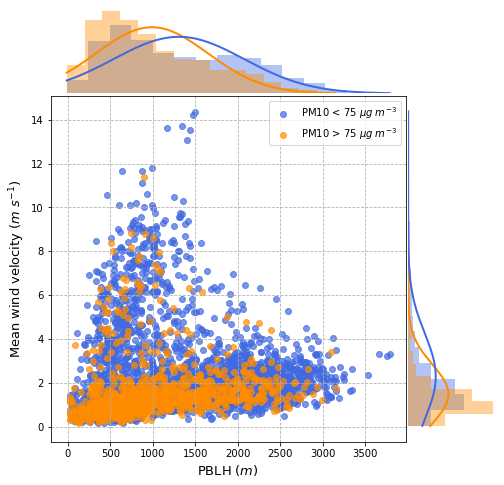

In [31]:
color_1 = 'darkorange'
color_2 = 'royalblue'
nom_pm10 = 75

h = sorted(vc_day.loc[vc_day['PM10'] > nom_pm10]['pblh'].dropna())
j = sorted(vc_day.loc[vc_day['PM10'] < nom_pm10]['pblh'].dropna())

fit_h = stats.norm.pdf(h, np.mean(h), np.std(h))
fit_j = stats.norm.pdf(j, np.mean(j), np.std(j))

k = sorted(vc_day.loc[vc_day['PM10'] > nom_pm10]['u_mean'].dropna())
l = sorted(vc_day.loc[vc_day['PM10'] < nom_pm10]['u_mean'].dropna())

fit_k = stats.norm.pdf(k, np.mean(k), np.std(k))
fit_l = stats.norm.pdf(l, np.mean(l), np.std(l))

fig = plt.figure(figsize=(8,8))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.01, hspace=0.01)

ax1 = fig.add_subplot(gs[0])
ax1.hist(vc_day.loc[vc_day['PM10'] < nom_pm10]['pblh'],density = True, alpha = 0.4, color = color_2, bins = 15)
ax1.hist(vc_day.loc[vc_day['PM10'] > nom_pm10]['pblh'],density = True, alpha = 0.4, color = color_1, bins = 15)
ax1.plot(h,fit_h, c = color_1, linewidth=2)
ax1.plot(j,fit_j, c = color_2, linewidth=2)
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1])
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[2])
#CS = ax3.contour(xi,yi,VC_grid, colors='k', levels=[3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000],alpha = 0.7)
#ax3.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
ax3.scatter(vc_day.loc[vc_day['PM10'] < nom_pm10]['pblh'], vc_day.loc[vc_day['PM10'] < nom_pm10]['u_mean'], 
            c = color_2, alpha = 0.7, label = "PM10 < 75 $\mu g \ m^{-3}$")
ax3.scatter(vc_day.loc[vc_day['PM10'] > nom_pm10]['pblh'], vc_day.loc[vc_day['PM10'] > nom_pm10]['u_mean'], 
            c = color_1, alpha = 0.7, label = "PM10 > 75 $\mu g \ m^{-3}$")
ax3.set_xlabel(r'PBLH ($m$)', fontsize = 13)
ax3.set_ylabel(r'Mean wind velocity ($m \ s^{-1}$)', fontsize = 13)
ax3.legend()
ax3.grid(linestyle='--')

ax4 = fig.add_subplot(gs[3])
ax4.hist(vc_day.loc[vc_day['PM10'] < nom_pm10]['u_mean'],density = True, alpha = 0.4, color = color_2, bins = 20, 
         orientation = "horizontal")
ax4.hist(vc_day.loc[vc_day['PM10'] > nom_pm10]['u_mean'],density = True, alpha = 0.4, color = color_1, bins = 20,
        orientation = "horizontal")
ax4.plot(fit_k, k, c = color_1, linewidth=2)
ax4.plot(fit_l, l, c = color_2, linewidth=2)
ax4.set_axis_off()

I set a threshold for the three contaminants and I wanted to see in which regions this bad episodes accumulated. So here is were machine learning can be useful.

# Machine learning

- The first idea here will be to do a nonlinear classification between good events and bad events. 
- A second idea could be to characterize the pollution using all the values, and not only the threshold.

And this is where you enter the game, Alexander Suslov. The ball is in your hands: